In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.join(os.getcwd(), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [14]:
import numpy as np
import random
import ast
import pandas as pd
import itertools
from itertools import product
import csv
from src.data_preprocessing import *
from sklearn.model_selection import train_test_split
from src.optimizers import *
from src.activation_functions import * 
from src.utils import *
from src.model_regularization import *
from src.layer import *
from src.batch_normalization import *
from loss_functions import *
from src.neural_network import *
from src.train_and_evaluate import *
from src.random_search import *
from src.k_fold_cross_validation import *
# from src.random_search import *
np.random.seed(0)


<!-- #### Data pre-processing for MONK Datasets  -->

In [15]:
X_train, y_train = load_data(MONK_NUM=2)
X_test, y_test = load_data(MONK_NUM=2, train=False)

one hot encoded data:  (169, 17)
one hot encoded data:  (432, 17)


In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [17]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Training set overlap with validation set:",
      np.intersect1d(X_train, X_val).shape[0])

Training set size: 135
Validation set size: 34
Training set overlap with validation set: 2


In [18]:
# Print the shape of the resulting datasets
for _ in [X_train, X_val, y_train, y_val]:
    print(f"the shape: ", _.shape)

the shape:  (135, 17)
the shape:  (34, 17)
the shape:  (135,)
the shape:  (34,)


In [19]:
param_distributions = {
    'hidden_size': [[3], [4], [5], [6]],
    'hidden_activation': [[Activation_Tanh], [Activation_Leaky_ReLU], [Activation_Sigmoid], [Activation_ReLU]],
    'batch_norm': [[True], [False]],
    'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1],
    'l1': [0.0, 1e-5, 1e-4, 1e-3, 1e-2],
    'l2': [0.0, 1e-5, 1e-4, 1e-3, 1e-2],
    'dropout_rate': [0.0, 0.1, 0.3],
    'batch_size': [1000],
    'n_epochs': [150, 200],
    'weight_decay': list(np.arange(0.0, 0.05, 0.01))
    # # Define combinations of hidden layer sizes and corresponding activations
    # 'hidden_configs': [
    #     {'hidden_size': [10], 'hidden_activation': [Activation_Tanh], 'batch_norm' : [True]},
    #     {'hidden_size': [10, 10], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm' : [True, True]},
    #     {'hidden_size': [10, 10], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm' : [True, True]},
    #     {'hidden_size': [20, 20], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm' : [True, False]},
    #     {'hidden_size': [20, 20], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm' : [True, True]},
    #     {'hidden_size': [20, 20], 'hidden_activation': [Activation_ELU, Activation_ELU], 'batch_norm' : [True, False]},
    #     {'hidden_size': [10, 10], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm' : [True, False]},
    #     {'hidden_size': [32, 16], 'hidden_activation': [Activation_Leaky_ReLU, Activation_Sigmoid], 'batch_norm' : [False, True]},  
    #     {'hidden_size': [30, 30], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm' : [True, False]},
    #     {'hidden_size': [64, 32, 16], 'hidden_activation': [Activation_ReLU, Activation_ReLU, Activation_Tanh], 'batch_norm' : [True, False, True]},
    #     {'hidden_size': [30, 30], 'hidden_activation': [Activation_Leaky_ReLU, Activation_ELU], 'batch_norm': [True, False]}
    # ]   
}

TODO:

Create a seperate best_results csv file for each MONK 

In [20]:
best_hyperparams, best_performance = random_search(X_train=X_train,
                                                   y_train=y_train,
                                                   
                                                #    X_val=X_val,
                                                #    y_val=y_val,
                                                   param_distributions=param_distributions,
                                                   n_iters=50)  # adjust n_iters as needed

print(best_hyperparams)

[3] [<class 'src.activation_functions.Activation_Leaky_ReLU'>] [0.3] [True]
✅ Fold 1/5 | Validation Accuracy: 0.7037
[3] [<class 'src.activation_functions.Activation_Leaky_ReLU'>] [0.3] [True]
✅ Fold 2/5 | Validation Accuracy: 0.7037
[3] [<class 'src.activation_functions.Activation_Leaky_ReLU'>] [0.3] [True]
✅ Fold 3/5 | Validation Accuracy: 0.3333
[3] [<class 'src.activation_functions.Activation_Leaky_ReLU'>] [0.3] [True]
✅ Fold 4/5 | Validation Accuracy: 0.3333
[3] [<class 'src.activation_functions.Activation_Leaky_ReLU'>] [0.3] [True]
✅ Fold 5/5 | Validation Accuracy: 0.6296

📊 Manual K-Fold | Mean Validation Accuracy over 5 folds: 0.5407
[6] [<class 'src.activation_functions.Activation_Tanh'>] [0.0] [False]
✅ Fold 1/5 | Validation Accuracy: 0.6667
[6] [<class 'src.activation_functions.Activation_Tanh'>] [0.0] [False]
✅ Fold 2/5 | Validation Accuracy: 0.7037
[6] [<class 'src.activation_functions.Activation_Tanh'>] [0.0] [False]
✅ Fold 3/5 | Validation Accuracy: 0.5926
[6] [<class 's

In [22]:
learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, hidden_size, hidden_activation, use_batch_norm, weight_decay, validation_accuracy = best_hyperparams.values()
learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, hidden_size, hidden_activation, use_batch_norm, weight_decay

(0.1,
 1e-05,
 0.01,
 0.0,
 1000,
 200,
 [4],
 ['Activation_Leaky_ReLU'],
 [True],
 0.04)

GRID SEARCH

In [23]:
activation_map = {
    'Activation_ReLU': Activation_ReLU,
    'Activation_Tanh': Activation_Tanh,
    'Activation_ELU': Activation_ELU,
    'Activation_Leaky_ReLU': Activation_Leaky_ReLU,
    'Activation_Sigmoid': Activation_Sigmoid
}

hidden_activation = [activation_map[act] for act in hidden_activation]  

In [27]:

model = NN(
    l1=l1,
    l2=l2,
    input_size=17,
    hidden_sizes=hidden_size,
    output_size=1,
    hidden_activations=hidden_activation,
    dropout_rates=[dropout_rate],
    use_batch_norm=use_batch_norm
)
batch_size = batch_size
learning_rate = learning_rate
n_epochs = n_epochs

[4] [<class 'src.activation_functions.Activation_Leaky_ReLU'>] [0.0] [True]


Data shapes:
X_train: (135, 17), y_train: (135,)
Sample prediction: [[0.]]
Initial loss: 0.0
Epoch 0: Train Loss: 1.7775, Acc: 25.19% | Val Loss: 1.2182, Acc: 29.41%
Epoch 10: Train Loss: 0.3703, Acc: 42.22% | Val Loss: 0.2575, Acc: 64.71%
Epoch 20: Train Loss: 0.1746, Acc: 67.41% | Val Loss: 0.3815, Acc: 44.12%
Epoch 30: Train Loss: 0.1237, Acc: 91.11% | Val Loss: 0.2800, Acc: 91.18%
Epoch 40: Train Loss: 0.1005, Acc: 92.59% | Val Loss: 0.2740, Acc: 91.18%
Epoch 50: Train Loss: 0.0901, Acc: 96.30% | Val Loss: 0.2924, Acc: 79.41%
Epoch 60: Train Loss: 0.0833, Acc: 95.56% | Val Loss: 0.3041, Acc: 73.53%
Epoch 70: Train Loss: 0.0923, Acc: 91.11% | Val Loss: 0.3131, Acc: 76.47%
Epoch 80: Train Loss: 0.0781, Acc: 97.04% | Val Loss: 0.4485, Acc: 94.12%
Epoch 90: Train Loss: 0.0776, Acc: 97.04% | Val Loss: 0.3375, Acc: 88.24%
Epoch 100: Train Loss: 0.0725, Acc: 95.56% | Val Loss: 0.3100, Acc: 82.35%
Epoch 110: Train Loss: 0.0781, Acc: 95.56% | Val Loss: 0.4871, Acc: 85.29%
Early stopping at 

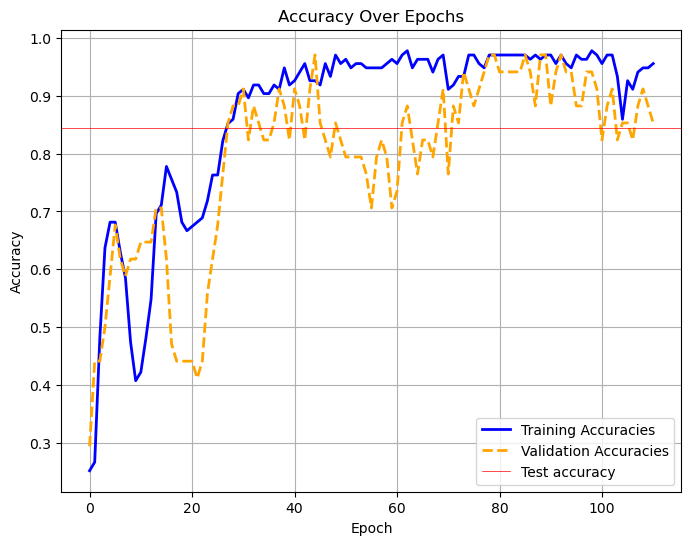

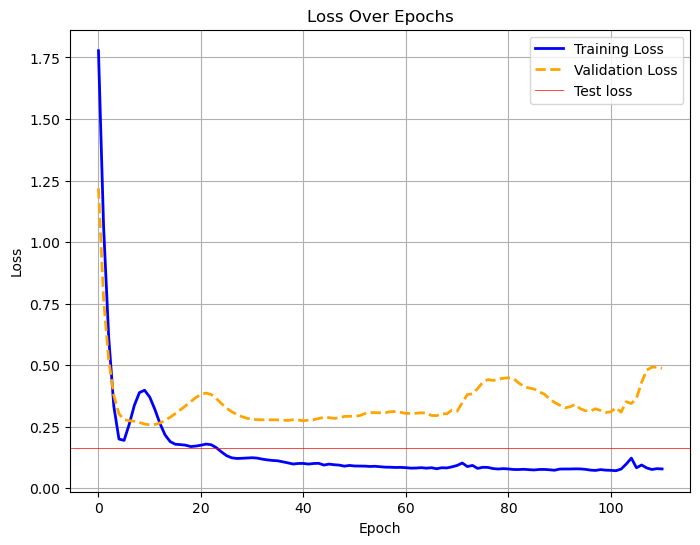

In [28]:
import copy

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

loss_function = MSE()
optimizer = Optimizer_Adam(learning_rate=learning_rate, decay=1e-3)

# Initialize early stopping
early_stopping = EarlyStopping(patience=100, min_delta_loss=1e-5, min_delta_accuracy=0.001)

# Before training loop:
print("Data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Sample prediction: {model.forward(X_train[:1])}")
print(f"Initial loss: {loss_function.forward(model.output, y_train[:1])}")

# Training loop
for epoch in range(n_epochs):
    batch_losses = []
    batch_accuracies = []

    for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
        # Forward pass
        model.forward(X_batch, training=True)

        # Loss and accuracy
        loss = loss_function.forward(model.output, y_batch)
        predictions = np.round(model.output.squeeze())
        accuracy = np.mean(predictions == y_batch.squeeze())

        # Backward pass
        loss_function.backward(model.output, y_batch)
        dvalues = loss_function.dinputs

        assert dvalues.shape == model.output.shape, \
            f"Gradient shape mismatch: {dvalues.shape} vs {model.output.shape}"

        for layer in reversed(model.layers):
            layer.backward(dvalues)
            dvalues = layer.dinputs

            # Regularization
            if isinstance(layer, Layer_Dense):
                if layer.l1 > 0:
                    layer.dweights += layer.l1 * np.sign(layer.weights)
                if layer.l2 > 0:
                    layer.dweights += 2 * layer.l2 * layer.weights

        # Update weights
        optimizer.pre_update_params()
        for layer in model.layers:
            if isinstance(layer, Layer_Dense):
                optimizer.update_params(layer)
        optimizer.post_update_params()

        batch_losses.append(loss)
        batch_accuracies.append(accuracy)

    # Epoch summary
    epoch_loss = np.mean(batch_losses)
    epoch_acc = np.mean(batch_accuracies)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Validation
    X_val_input = X_val.values if isinstance(X_val, pd.DataFrame) else X_val
    y_val_input = y_val.values if isinstance(y_val, (pd.Series, pd.DataFrame)) else y_val

    model.forward(X_val_input, training=False)
    val_loss = loss_function.forward(model.output, y_val_input)
    val_predictions = np.round(model.output.squeeze())
    val_accuracy = np.mean(val_predictions == y_val.squeeze())

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: ", end="")
        print(f"Train Loss: {epoch_loss:.4f}, Acc: {epoch_acc*100:.2f}% | ", end="")
        print(f"Val Loss: {val_loss:.4f}, Acc: {val_accuracy*100:.2f}%")

    # Early stopping check
    early_stopping.on_epoch_end(
        current_loss=val_loss,
        current_accuracy=val_accuracy,
        model=model.layers,
        epoch=epoch
    )

    if early_stopping.stop_training:
        print(f"Early stopping at epoch {epoch}")
        break

# Restore best weights
if early_stopping.stop_training:
    print(f"Restoring model weights from epoch {early_stopping.best_epoch}")
    early_stopping.restore_weights(model.layers)

# Final evaluation
model.forward(X_val_input, training=False)
final_val_loss = loss_function.forward(model.output, y_val_input)
final_val_accuracy = np.mean(np.round(model.output.squeeze()) == y_val.squeeze())
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


# Test set evaluation
model.forward(X_test, training=False)
test_loss = loss_function.forward(model.output.squeeze(), y_test)

predictions = np.round(model.output.squeeze())
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test
test_accuracy = np.mean(predictions == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training progress
plot_accuracies(train_accuracies, val_accuracies, test_accuracy,
                label1="Training Accuracies", label2="Validation Accuracies",
                title="Accuracy Over Epochs")

plot_losses(train_losses, val_losses, test_loss,
            label1="Training Loss", label2="Validation Loss",
            title="Loss Over Epochs")

In [29]:
print(train_losses, val_losses)

[1.777504306793363, 1.0634179285880903, 0.6135228320647893, 0.33230869099310695, 0.19964767832111852, 0.19418632196800695, 0.25931829066847917, 0.33624781172591917, 0.3885682514255298, 0.3979009098993132, 0.370343607017108, 0.32044144778021305, 0.2629709092707086, 0.21634804620138628, 0.18906717220938227, 0.17845579571436473, 0.17690933236527354, 0.17470929162641574, 0.16908556947111986, 0.17097086364451822, 0.174562073145626, 0.1791683983805348, 0.17649735985180867, 0.1645261533830135, 0.1474043908410773, 0.1320796828620657, 0.1234441234032754, 0.12061918413766254, 0.1213838175159656, 0.12256986600961918, 0.12368384211800029, 0.12201446808517843, 0.11790957963547884, 0.11482367023100483, 0.11258839056113207, 0.11110481344557507, 0.10695259737363592, 0.10273631898800342, 0.09804761634184198, 0.10036313902620132, 0.10052882988817366, 0.09787975120480115, 0.10030093877125476, 0.10093511238909532, 0.09384446927352098, 0.09773153356746207, 0.09523348584184688, 0.0936308722259087, 0.0894332

In [31]:
model.forward(X_test, training=False)
# Compute softmax probabilities for the test output
# print(X_test.shape, y_test.shape)
# print(model.output, y_test)
loss_function.forward(model.output.squeeze(), y_test)
# Calculate accuracy for the test set
predictions = np.round(model.output.squeeze())
if len(y_test.shape) == 2:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Compute test accuracy
test_accuracy = np.mean(predictions == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8449
